<a href="https://colab.research.google.com/github/vkate1/Summer-Training-for-III-year/blob/main/Day12/autoencoder_made_easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** You could find my Kaggle notebook by clicking this link below** https://www.kaggle.com/code/vandanakate19/autoencoder-made-easy

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

> ## >Part 1
# *Get MNIST handwritten digit data*

In [2]:
# Why _?? because we dont care for Y_train or Y_test 


(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [4]:
len(X_train)

60000

# *Preprocess the data*

In [5]:
# We Normalize the 3D images   
# 28 X 28 = 784 (Flattening)

def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


# *Visualize the digits*

In [6]:

def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

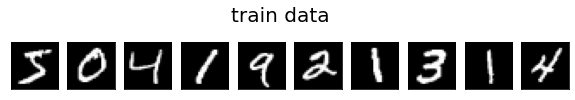

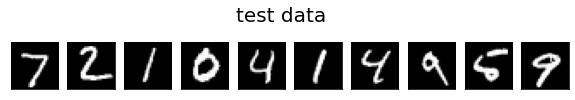

In [7]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

# *Build the digit Autoencoder*

In [8]:
# input_dim == output_dim  because we have to regenerate output image
# Latent image size is assumed to be 100

input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [9]:
# Here we have named each layer

# encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [10]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 CODE (Dense)                (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


# *Trian the digit Autoencoder*

In [11]:
AE.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0759
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0735
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0722
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0712
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0706
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0700
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0696
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0693


# *Get the decoded (reconstructed) data*

In [12]:
decoded_data = AE.predict(X_test)

313/313 [==============================] - 1s 3ms/step


# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given input.*

In [13]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

# *Get the encoded data*

In [14]:
encoded_data = get_encoded_data.predict(X_test)

313/313 [==============================] - 1s 2ms/step


# *Visualize the results on test set*

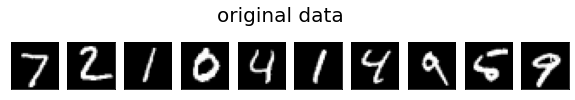

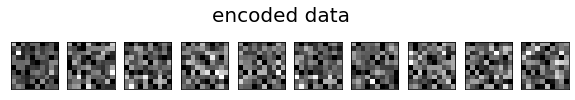

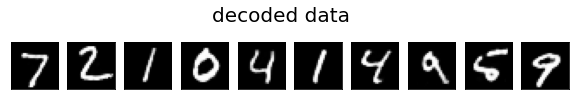

In [15]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")

---

> ## >Part 2
# *Get the cat images*

In [16]:
cat_train_path = "../input/cat-and-dog/training_set/training_set/cats/"
cat_test_path = "../input/cat-and-dog/test_set/test_set/cats/"

cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/cat-and-dog/training_set/training_set/cats/'

# *Visualize the cats*

In [ ]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [ ]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

# *Build the cat Autoencoder*

In [ ]:
input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [ ]:
cat_AE = Model(input_layer, output_layer)
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

# *Train the cat Autoencoder*

In [ ]:
cat_AE.fit(cat_train, cat_train,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_data=(cat_test, cat_test))

# *Save model*

In [ ]:
cat_AE.save("cat_AE.h5")

# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given cat image.*

In [ ]:
get_encoded_cat = Model(inputs=cat_AE.input, outputs=cat_AE.get_layer("CODE").output)

# *Get the encoded cats*

In [ ]:
encoded_cat = get_encoded_cat.predict(cat_test)
encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

# *Get the reconstructed cats*

In [ ]:
reconstructed_cats = cat_AE.predict(cat_test)

# *Visualize the results on test set*

In [ ]:
show_cat_data(cat_test, title="original cats")
show_data(encoded_cat, height=32, width=64, title="encoded cats")
show_cat_data(reconstructed_cats, title="reconstructed cats")

---

# *If you liked this notebook please visit my channel [Normalized Nerd](http://youtube.com/NormalizedNerd) ❤️*